## EXPLORATORY DATA ANALYSIS - AIRBNB DATA

**STEP 1: LOAD DATA SET**

In [75]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


**STEP 2: INICIAL ANALYSIS, DEFINING VARIABLES AND DATA CLEANING**

In [76]:
# DIMENSION OF DATA FRAME
print("Dimension of data frame: ", df.shape)

Dimension of data frame:  (48895, 16)


In [77]:
# INFORMATION OF DATA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [78]:
# CHECKING DATA STATUS
df.sample(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
33903,26846907,Large Bedroom w/Private Bathroom in DUMBO,201909387,Cagla,Brooklyn,Downtown Brooklyn,40.69730,-73.98359,Private room,70,30,1,2018-09-13,0.10,1,0
45269,34646244,Room in 4 bed 2 bath by J train with Queen bed,10387090,Luis Enrique,Brooklyn,Bedford-Stuyvesant,40.68296,-73.91255,Private room,36,15,1,2019-05-13,0.52,5,343


In [79]:
# NON NUMERCIAL COLUMNS
df.describe(include='object')

,name,host_name,neighbourhood_group,neighbourhood,room_type,last_review
count,48879,48874,48895,48895,48895,38843
unique,47905,11452,5,221,3,1764
top,Hillside Hotel,Michael,Manhattan,Williamsburg,Entire home/apt,2019-06-23
freq,18,417,21661,3920,25409,1413


In [80]:
# OBSERVING ALL THE COLUMNS TO DEFINING VARIABLES
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In conclusion we have 48895 rows in 16 columns, it can be seen that the highest percentage of NaN data is to be found in the `last_review` and `number_of_reviews`

By defining the variables for subsequent analysis we would obtain:

* Categorical: `name`, `host_name`, `neighbourhood_group`, `neighbourhood`, `room_type`, `last_review`, `id`, `host_id`.

* Numerical:`latitude`, `longitude`, `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`,`calculated_host_listing_count`,`availability_365`.

In [81]:
# FINDING THE DUPLICATE DATA

print(f"Name :{df['name'].duplicated().sum()}")
print(f"Host_name: {df['host_name'].duplicated().sum()}")
print(f"Host_id: {df['host_id'].duplicated().sum()}")
print(f"ID: {df['id'].duplicated().sum()}")

Name :989
Host_name: 37442
Host_id: 11438
ID: 0


In [82]:
# DELETING THE IRRELEVANT INFORMATION

df.drop(['name','host_name','last_review', 'latitude', 'longitude','id','reviews_per_month'], axis = 1, inplace=True)
df.head()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,Private room,149,1,9,6,365
1,2845,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,4632,Manhattan,Harlem,Private room,150,3,0,1,365
3,4869,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,7192,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


**STEP 3: ANALYSIS OF VARIABLES**

**_3.0 Categorical:_**

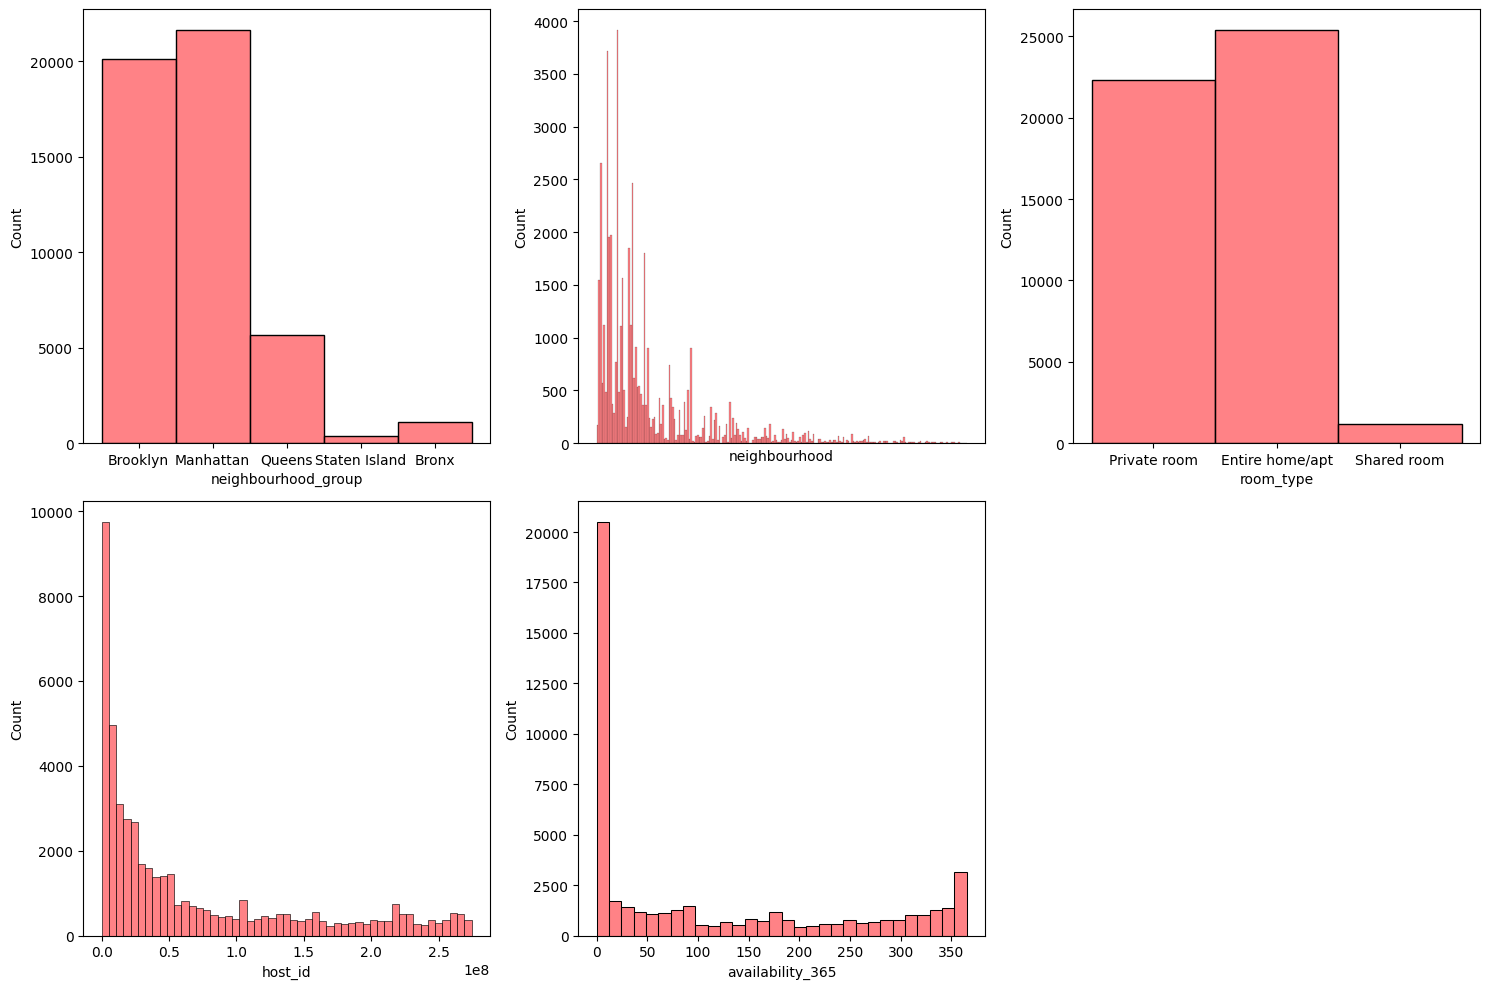

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure
fig, axis = plt.subplots(2, 3, figsize=(15,10))

# Building the plots
sns.histplot(ax=axis[0, 0], data=df, x="neighbourhood_group", color="#FF585D")
sns.histplot(ax=axis[0, 1], data=df, x="neighbourhood", color="#FF585D").set_xticks([])
sns.histplot(ax=axis[0, 2], data=df, x="room_type", color="#FF585D")
sns.histplot(ax=axis[1, 0], data=df, x="host_id", color="#FF585D")
sns.histplot(ax=axis[1, 1], data=df, x="availability_365", color="#FF585D")
fig.delaxes(axis[1, 2])

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()

* `neighbourhood_group`: Able to observe that the data set was concentrated in 4 neighbourhoods and there is considerable preference for 2 of them, these two being Brooklyn, Manhattan.
* In term of `room_type` shows that the customer prefers to rent entire dwellings rather than shared spaces.
* `host_id`: there is a high concentration of property ownership on one host.
* As for `availability_365` there are many values at 0, so we will proceed to analyse if they correspond to missing information or high rental demand, meaning that certain properties were rented for long periods, which could be consistent, as we know that New York is a city of high tourist demand.

**_3.1 Numerical_**:

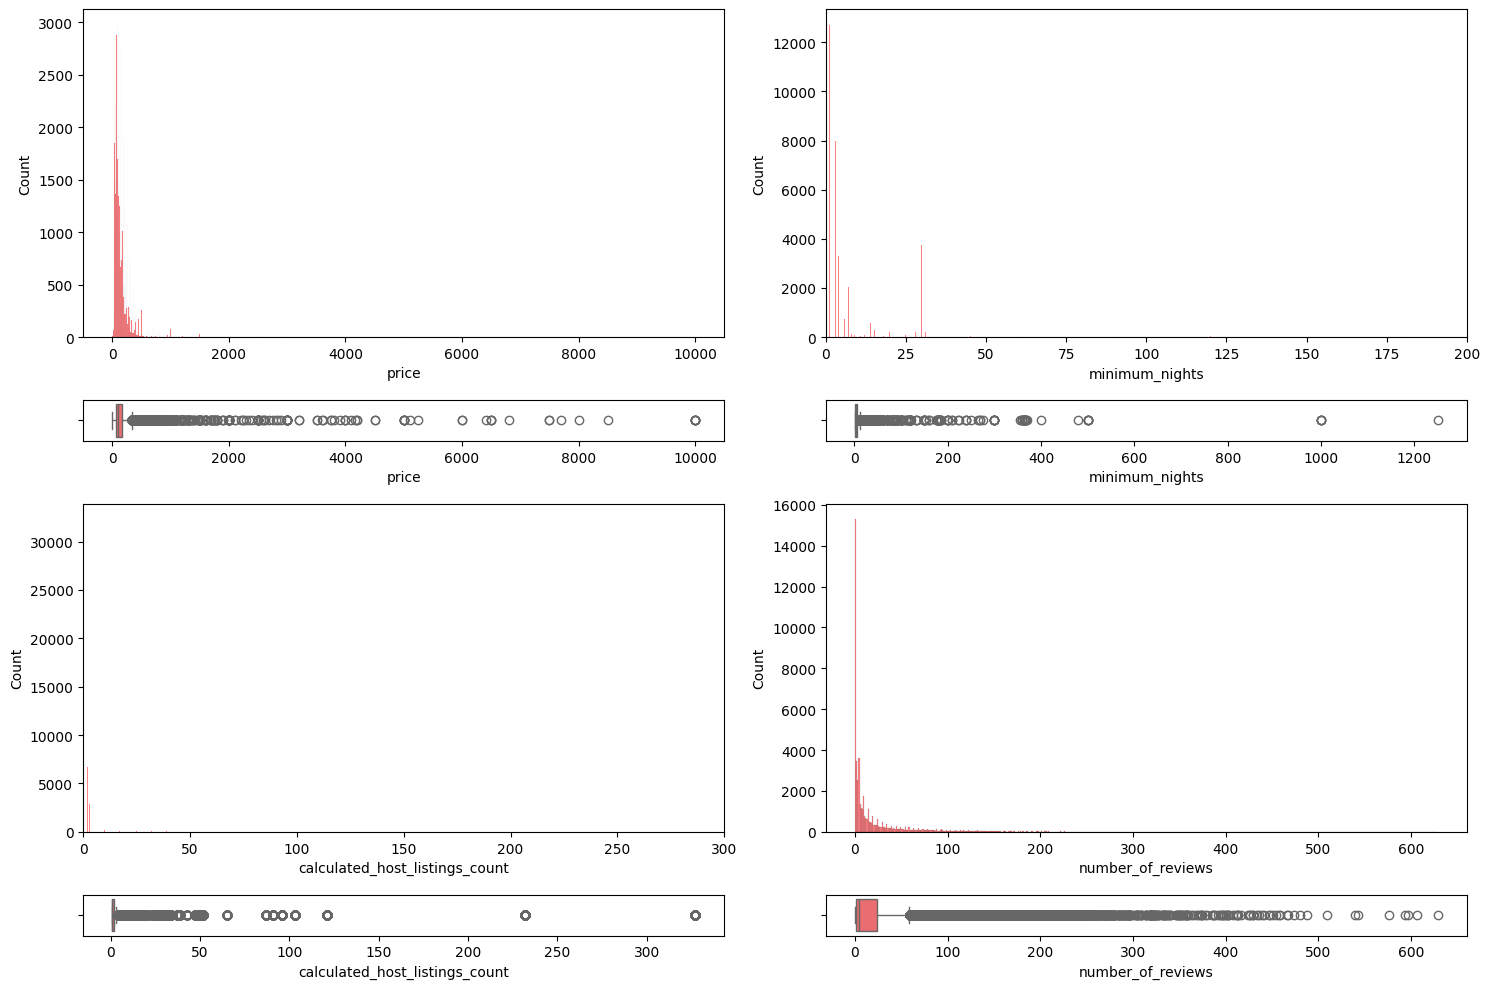

In [84]:
# Create the figure
fig, axis = plt.subplots(4, 2, figsize = (15, 10), gridspec_kw = {"height_ratios": [8, 1, 8, 1]})

sns.histplot(ax=axis[0, 0], data=df, x="price", color="#FF585D")
sns.boxplot(ax=axis[1, 0], data=df, x="price", color="#FF585D")

sns.histplot(ax=axis[0, 1], data=df, x="minimum_nights", color="#FF585D").set_xlim(0, 200)
sns.boxplot(ax=axis[1, 1], data=df, x="minimum_nights", color="#FF585D")

sns.histplot(ax=axis[2, 0], data=df, x="calculated_host_listings_count", color="#FF585D").set_xlim(0, 300)
sns.boxplot(ax=axis[3, 0], data=df, x="calculated_host_listings_count", color="#FF585D")

sns.histplot(ax=axis[2, 1], data=df, x="number_of_reviews", color="#FF585D")
sns.boxplot(ax=axis[3 ,1], data=df, x="number_of_reviews", color="#FF585D")


# Adjust the layout
plt.tight_layout()

# Display the layout
plt.show()

**_3.2 Categoriacal - Categorical_**

C:\Users\USER\AppData\Local\Temp\ipykernel_1548\3236081206.py:3: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:#FF585D'` for the same effect.

  sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group", color="#FF585D")


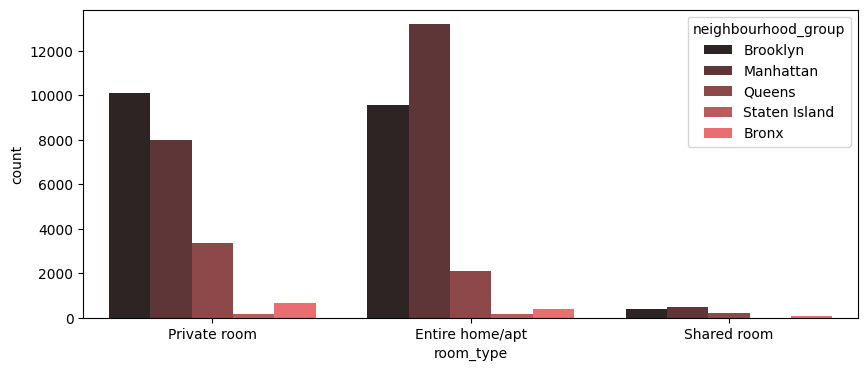

In [85]:
fig, axis = plt.subplots(figsize = (10, 4))

sns.countplot(data = df, x = "room_type", hue = "neighbourhood_group", color="#FF585D")

# Show the plot
plt.show()

**_3.3 Numerical - Numerical_**

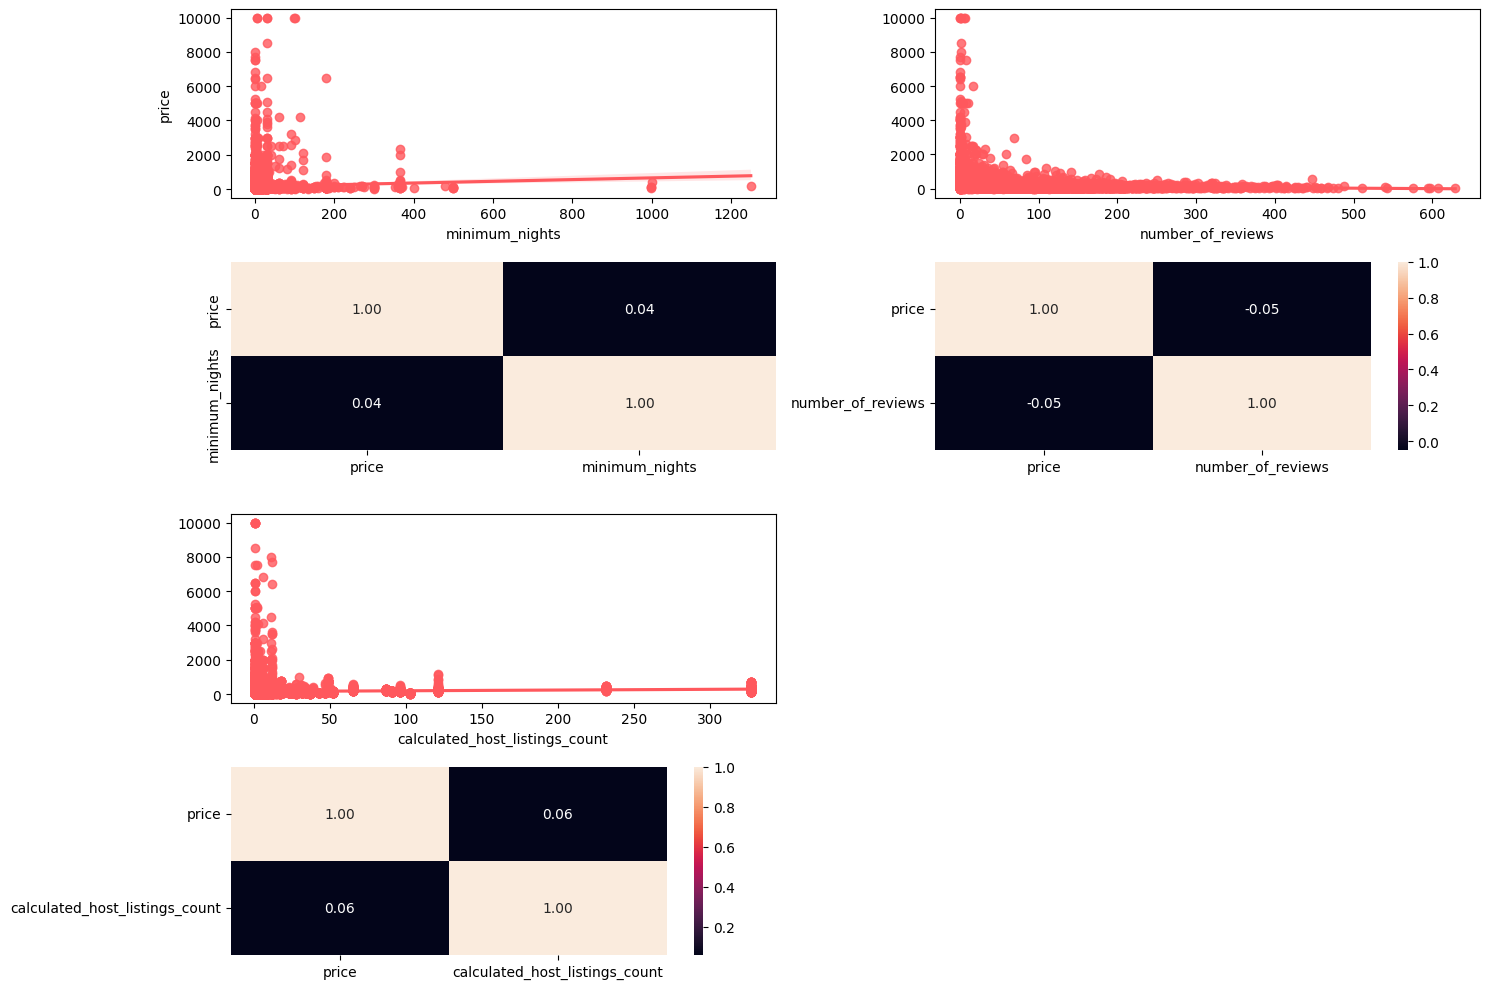

In [86]:
# Creating the figures
fig, axis = plt.subplots(4, 2, figsize = (15, 10))

# Set axis labels
sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price", color="#FF585D")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False, color="#FF585D")

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price", color="#FF585D").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], color="#FF585D")

sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price", color="#FF585D").set(ylabel = None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0], color="#FF585D").set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

**_3.4 Numerical - Categorical_**

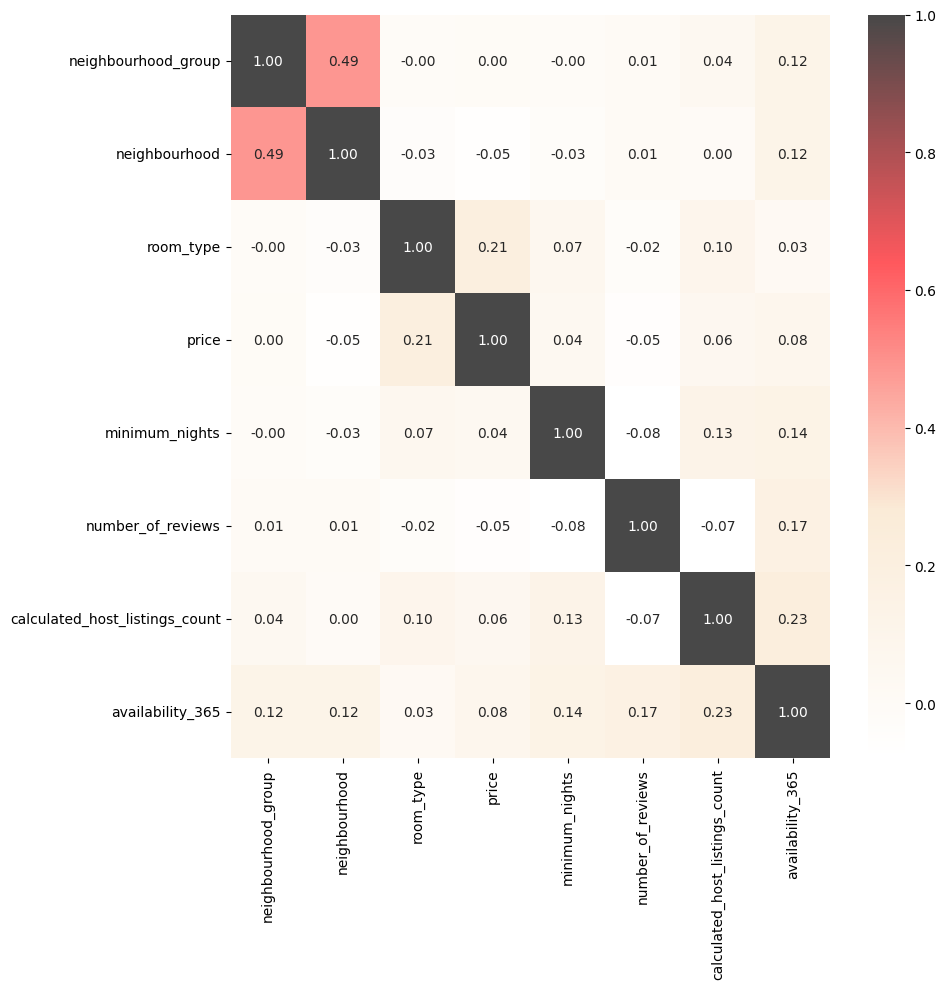

In [87]:
import matplotlib.colors as mcolors

# Create a custom color palette
custom_palette = mcolors.LinearSegmentedColormap.from_list("Custom", ["#FFFFFF","#FAEBD7","#FF585D","#484848"])

# Factorize the categorical variables
df["room_type"] = pd.factorize(df["room_type"])[0]
df["neighbourhood_group"] = pd.factorize(df["neighbourhood_group"])[0]
df["neighbourhood"] = pd.factorize(df["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(10, 10))

sns.heatmap(df[["neighbourhood_group", "neighbourhood", "room_type", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f", cmap=custom_palette)

plt.tight_layout()

# Draw Plot
plt.show()

**_3.5 All data analysis_**

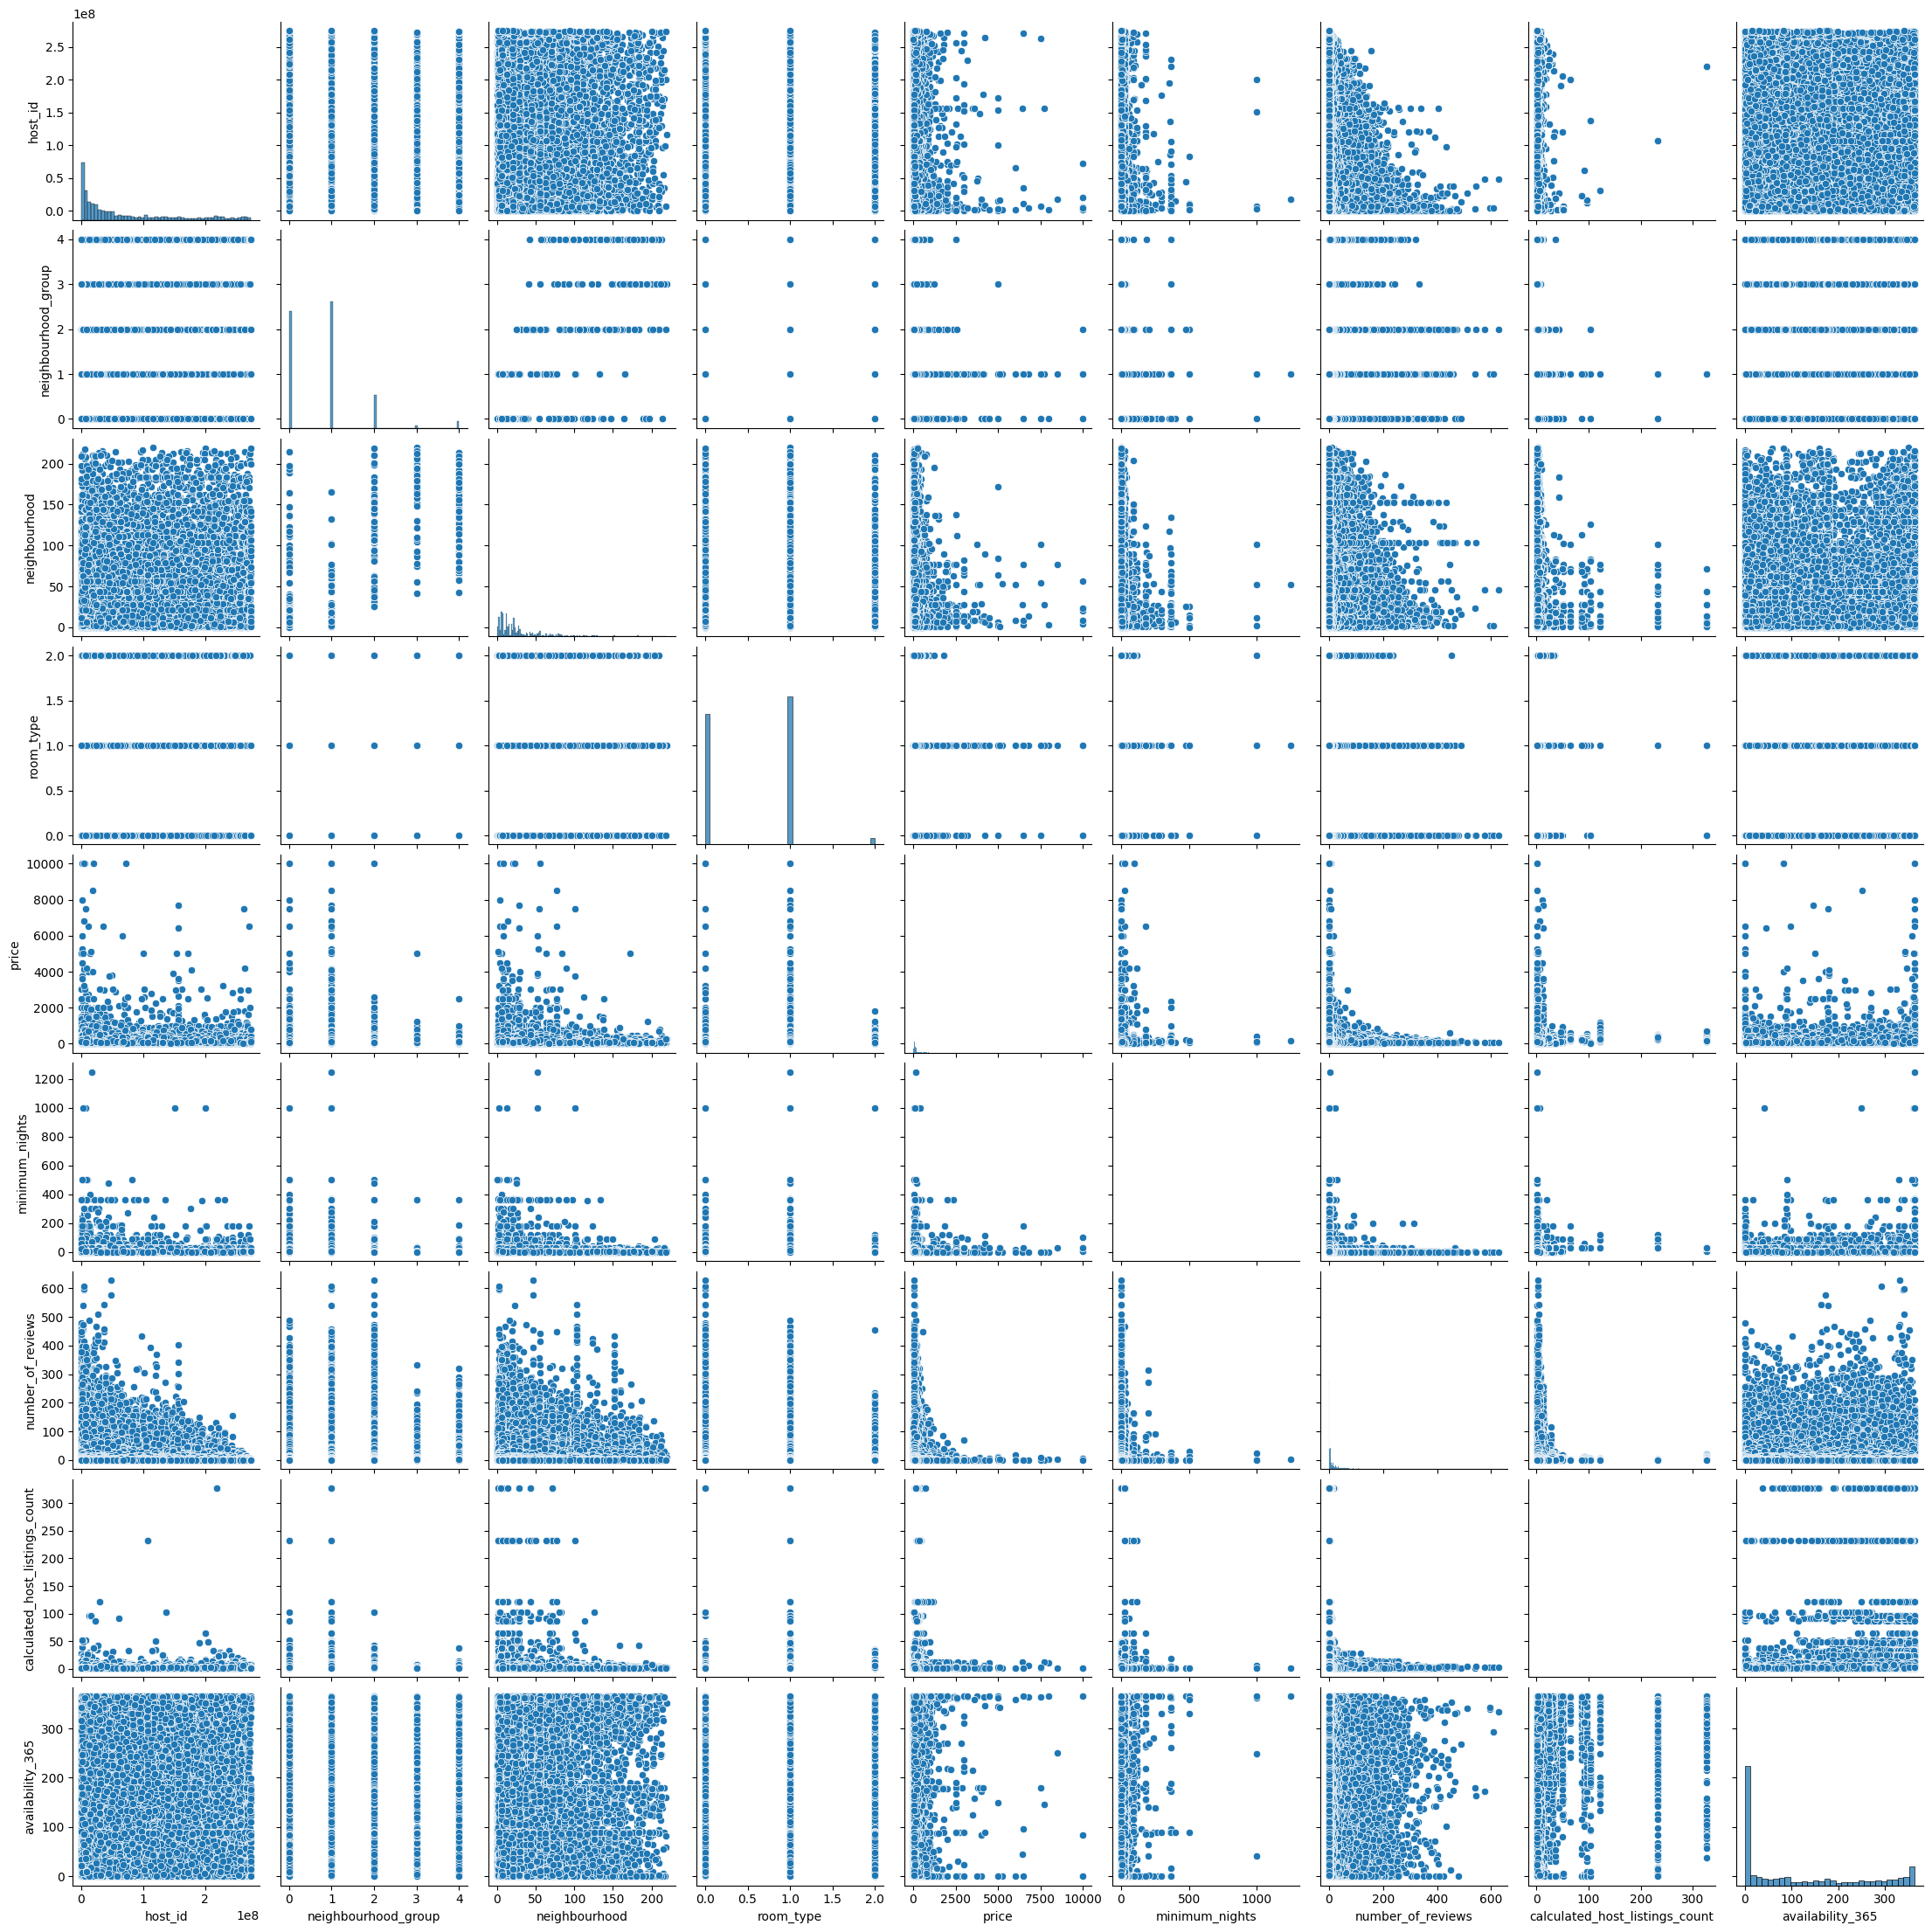

In [88]:
sns.pairplot(data = df)

**STEP 4: CHARACTERISTICS ENGINEERING**

**_4.1 Outlier analysis_**

In [90]:
df.describe()

,host_id,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,6.762001e+07,0.786911,29.888782,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,7.861097e+07,0.844386,34.676634,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.438000e+03,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.822033e+06,0.000000,7.500000,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.079382e+07,1.000000,19.000000,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.074344e+08,1.000000,37.000000,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,2.743213e+08,4.000000,220.000000,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


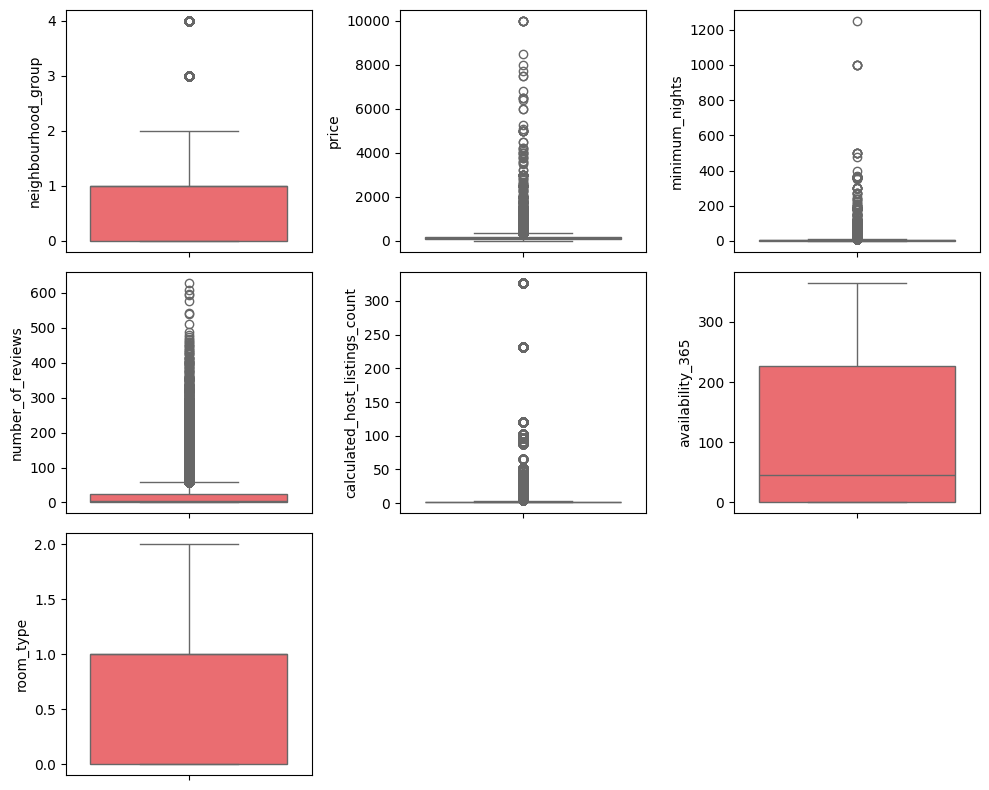

In [96]:
fig, axis = plt.subplots(3, 3, figsize = (10, 8))

sns.boxplot(ax = axis[0, 0], data = df, y = "neighbourhood_group", color="#FF585D")
sns.boxplot(ax = axis[0, 1], data = df, y = "price", color="#FF585D")
sns.boxplot(ax = axis[0, 2], data = df, y = "minimum_nights", color="#FF585D")
sns.boxplot(ax = axis[1, 0], data = df, y = "number_of_reviews", color="#FF585D")
sns.boxplot(ax = axis[1, 1], data = df, y = "calculated_host_listings_count", color="#FF585D")
sns.boxplot(ax = axis[1, 2], data = df, y = "availability_365", color="#FF585D")
sns.boxplot(ax = axis[2, 0], data = df, y = "room_type", color="#FF585D")
fig.delaxes(axis[2, 1])
fig.delaxes(axis[2, 2])

plt.tight_layout()

plt.show()

**_4.2 Outlier detection for `minimum_nights`_**

In [97]:
minimum_nights_outlier = df["minimum_nights"].describe()
minimum_nights_outlier = df["minimum_nights"].describe()
minimum_nights_outlier

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

In [101]:
# Calculate the interquartile range (IQR) for minimum_nights
nights_iqr = minimum_nights_outlier["75%"] - minimum_nights_outlier["25%"]

# Calculate the upper and lower limits for outliers
upper_limit = minimum_nights_outlier["75%"] + 1.5 * nights_iqr
lower_limit = minimum_nights_outlier["25%"] - 1.5 * nights_iqr

# Print the results
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")


The upper and lower limits for finding outliers are 11.0 and -5.0, with an interquartile range of 4.0


In [105]:
# Clean the outliers

df = df[df["minimum_nights"] <= 12]

In [109]:
count_0 = df[df["minimum_nights"] == 0].shape[0]
count_1 = df[df["minimum_nights"] == 1].shape[0]
count_2 = df[df["minimum_nights"] == 2].shape[0]
count_3 = df[df["minimum_nights"] == 3].shape[0]
count_4 = df[df["minimum_nights"] == 4].shape[0]


print("Count of 0: ", count_0)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)
print("Count of 3: ", count_3)
print("Count of 4: ", count_4)

Count of 0:  0
Count of 1:  12720
Count of 2:  11696
Count of 3:  7999
Count of 4:  3303


**_4.3 Outlier detection for `price`_**

In [110]:
price_outlier = df["price"].describe()
price_outlier = df["price"].describe()
price_outlier

count    42379.000000
mean       149.441185
std        210.467121
min          0.000000
25%         69.000000
50%        102.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [112]:
# Calculate the interquartile range (IQR) for minimum_nights
price_iqr = minimum_nights_outlier["75%"] - minimum_nights_outlier["25%"]

# Calculate the upper and lower limits for outliers
upper_limit = price_outlier["75%"] + 1.5 * price_iqr
lower_limit = price_outlier["25%"] - 1.5 * price_iqr

# Print the results
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")


The upper and lower limits for finding outliers are 181.0 and 63.0, with an interquartile range of 4.0


In [114]:
# Clean the outliers

df = df[df["price"] > 0]

In [115]:
count_0 = df[df["price"] == 0].shape[0]
count_1 = df[df["price"] == 1].shape[0]

print("Count of 0: ", count_0)
print("Count of 1: ", count_1)

Count of 0:  0
Count of 1:  0


**_4.3 Outlier detection for `calculated_host_listings_count`_**

In [116]:
host_count_outlier = df["calculated_host_listings_count"].describe()
host_count_outlier = df["calculated_host_listings_count"].describe()
host_count_outlier

count    8564.000000
mean        2.430290
std         3.438477
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        47.000000
Name: calculated_host_listings_count, dtype: float64

In [117]:
# Calculate the interquartile range (IQR) for minimum_nights
host_iqr = host_count_outlier["75%"] - host_count_outlier["25%"]

# Calculate the upper and lower limits for outliers
upper_limit = host_count_outlier["75%"] + 1.5 * host_iqr
lower_limit = host_count_outlier["25%"] - 1.5 * host_iqr

# Print the results
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")


The upper and lower limits for finding outliers are 6.0 and -2.0, with an interquartile range of 4.0


In [122]:
df = df[df["calculated_host_listings_count"] > 3]


In [124]:

count_06 = sum(1 for x in df["calculated_host_listings_count"] if x in range(0, 6))
count_1 = df[df["calculated_host_listings_count"] == 1].shape[0]
count_2 = df[df["calculated_host_listings_count"] == 2].shape[0]

print("Count of 0: ", count_06)
print("Count of 1: ", count_1)
print("Count of 2: ", count_2)

Count of 0:  762
Count of 1:  0
Count of 2:  0


**_4.4 Outlier detection for `number_of_reviews`_**

In [125]:
reviews_outlier = df["number_of_reviews"].describe()
reviews_outlier = df["number_of_reviews"].describe()
reviews_outlier

count    1458.000000
mean       40.741427
std        60.092354
min         0.000000
25%         6.000000
50%        19.000000
75%        55.750000
max       543.000000
Name: number_of_reviews, dtype: float64

In [126]:
# Calculate the interquartile range (IQR) for minimum_nights
reviews_iqr = reviews_outlier["75%"] - reviews_outlier["25%"]

# Calculate the upper and lower limits for outliers
upper_limit = reviews_outlier["75%"] + 1.5 * reviews_iqr
lower_limit = reviews_outlier["25%"] - 1.5 * reviews_iqr

# Print the results
print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(nights_iqr, 2)}")


The upper and lower limits for finding outliers are 130.38 and -68.62, with an interquartile range of 4.0


**_4.5 Missing value analysis_**

In [127]:
# Count NaN
df.isnull().sum().sort_values(ascending = False)

host_id                           0
neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

**_4.6 Feature scaling_**

In [128]:
from sklearn.preprocessing import MinMaxScaler

num_variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]
scaler = MinMaxScaler()
scal_features = scaler.fit_transform(df[num_variables])
df_scal = pd.DataFrame(scal_features, index = df.index, columns = num_variables)
df_scal["price"] = df["price"]
df_scal.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
39,0.394107,0.000000,0.000000,0.515068,0.25,1.0,40
149,0.049724,0.636364,0.023256,0.767123,0.00,0.0,44
249,0.355433,0.090909,0.046512,0.986301,0.75,0.0,36
250,0.270718,0.090909,0.046512,0.000000,0.75,0.0,37
251,0.325967,0.090909,0.046512,0.876712,0.75,0.0,37


**STEP 5: FEACTURE SELECTION**

In [129]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

X = df_scal.drop("price", axis = 1)
y = df_scal["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


selection_model = SelectKBest(chi2, k = 4)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,minimum_nights,calculated_host_listings_count,neighbourhood_group,room_type
0,0.363636,0.023256,0.25,0.0
1,0.090909,0.000000,0.00,1.0
2,0.000000,0.000000,0.00,0.0
3,0.000000,0.000000,0.50,0.0
4,0.363636,0.093023,0.25,0.0


In [131]:
#X_train_sel["price"] = list(y_train)
#X_test_sel["price"] = list(y_test)
#X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
#X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)